In [1]:
import pandas as pd
import boxball_loader as bbl

In [2]:
ev = bbl.load_event_data(bbl.Seasons(2010, 2019), requested_columns=['bat_last_id', 'inn_ct'])
ev.shape

(1848938, 12)

In [3]:
ev.columns

Index(['game_id', 'date', 'game_type', 'event_cd', 'inn_ct', 'bat_event_fl',
       'tb_ct', 'bat_last_id', 'ab_fl', 'h_fl', 'ob_fl', 'yr'],
      dtype='object')

In [4]:
ibb = ev[(ev['event_cd']==15)]

In [5]:
ibb.groupby(['bat_last_id', 'inn_ct'])['event_cd'].count() 

bat_last_id  inn_ct
0            1         119
             2         261
             3         289
             4         410
             5         502
             6         600
             7         635
             8         736
             9         713
             10        235
             11        127
             12         85
             13         57
             14         32
             15         16
             16          8
             17          5
             18          4
             19          2
1            1         117
             2         277
             3         322
             4         457
             5         577
             6         610
             7         797
             8         905
             9         516
             10        273
             11        163
             12         72
             13         53
             14         27
             15         17
             16          9
             17          5
        

<AxesSubplot:xlabel='inn_ct'>

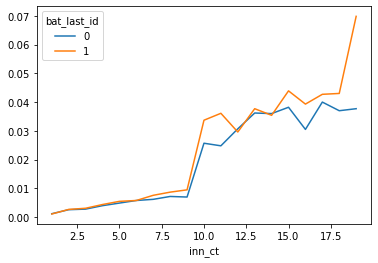

In [6]:
# ibb frequencies (per PA or event)
def summarize(pa):
    return pa.groupby(['inn_ct', 'bat_last_id'])['event_cd'].count()

(summarize(ibb) / summarize(ev)).round(4).unstack().plot()